In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

# $\vartheta$

In [6]:
L_list=[8,16,32,64,128,]
vartheta=np.linspace(0.01,0.49,21)
MI={}
for L in L_list:
    with open(f'class_A_vartheta(0.01,0.49,21)_En1000_L{L}_t{L}.pickle','rb') as f:
        rs=pickle.load(f)
        MI[L]=rs['MI']
        

In [7]:
# L_list=[8,16,32,64,128,]
vartheta=np.linspace(0.01,0.49,21)
# MI={}
for L in [256,]:
    with open(f'class_A_vartheta(0.01,0.49,11)_En1000_L{L}_t{L}.pickle','rb') as f:
        rs=pickle.load(f)
        MI[L]=rs['MI']
        

In [4]:
L=256
with open(f'class_A_vartheta(0.25,0.25,1)_En1000_L{L}_t{L}.pickle','rb') as f:
    rs=pickle.load(f)
    MI[L]=rs['MI']

In [5]:
L=256
with open(f'class_A_vartheta(0.25,0.25,1)_En1000_L{L}_t{L}.pickle.bak','rb') as f:
    rs=pickle.load(f)
    zz=rs['MI']

Text(0, 0.5, '$I_2(|L/4|:|L/4|)$')

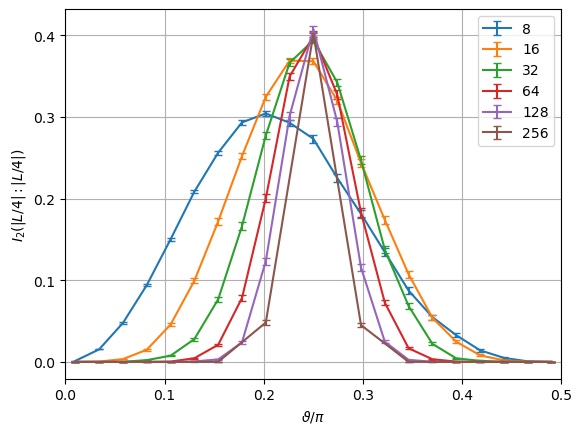

In [14]:
fig,ax=plt.subplots()
L_list=[8,16,32,64,128,256]
for L in L_list:
    vartheta=np.linspace(0.01,0.49,MI[L].shape[0])
    ax.errorbar(x=vartheta,y=MI[L].mean(axis=-1),yerr=MI[L].std(axis=-1)/np.sqrt(MI[L].shape[-1]),capsize=3,label=L)
ax.legend()
ax.grid('on')
ax.set_xlim([0,0.5])
ax.set_xlabel(r'$\vartheta/\pi$')
ax.set_ylabel(r'$I_2(|L/4|:|L/4|)$')

In [12]:
np.linspace(0.25,0.25,1)

array([0.25])

In [13]:
vartheta[10]

0.25

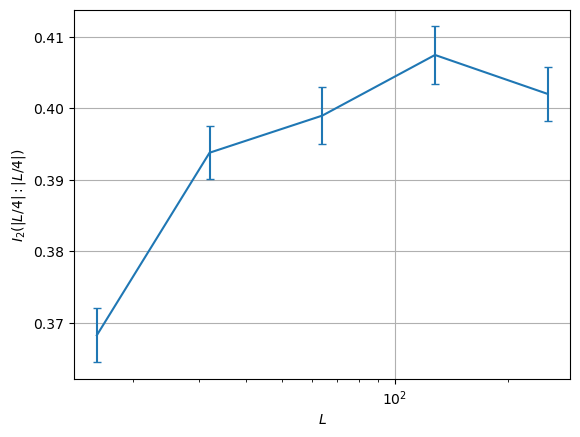

In [15]:
fig,ax=plt.subplots()
L_list=[16,32,64,128,256]
ax.errorbar(
    x=L_list,
    y=[MI[L].mean(axis=-1)[MI[L].shape[0]//2] for L in L_list],
    yerr=[MI[L].std(axis=-1)[MI[L].shape[0]//2]/np.sqrt(MI[L].shape[-1]) for L in L_list],
    capsize=3,)
# ax.legend()
ax.grid('on')
ax.set_xlabel(r'$L$')
ax.set_ylabel(r'$I_2(|L/4|:|L/4|)$')
ax.set_xscale('log')
# ax.set_xlim(1,257)
# ax.set_ylim(0,0.5)

# r

In [37]:
L_list=[8,16,32]
vartheta=np.linspace(0.01,0.49,21)
MI={}
EE={}
for L in L_list:
    with open(f'class_A_vartheta(0.49,0.49,1)_r(0.00,1.00,11)_En1000_L{L}_t{L}.pickle','rb') as f:
        rs=pickle.load(f)
        MI[L]=rs['MI']
        EE[L]=rs['EE']
        

Text(0, 0.5, '$I_2(|L/4|:|L/4|)$')

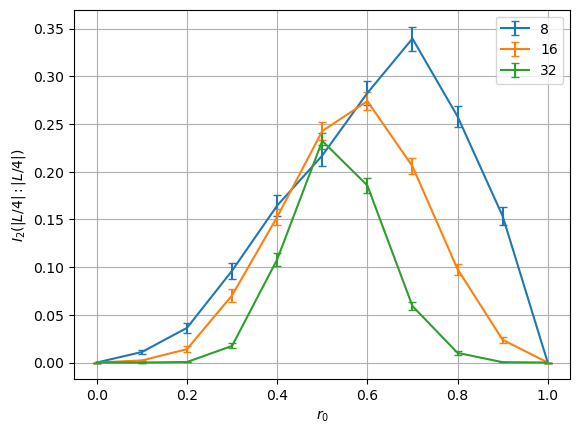

In [40]:
fig,ax=plt.subplots()
for L in L_list:
    r_list=np.linspace(0,1,MI[L].shape[1])
    ax.errorbar(x=r_list,y=MI[L].mean(axis=-1)[0],yerr=MI[L].std(axis=-1)[0]/np.sqrt(MI[L].shape[-1]),capsize=3,label=L)
ax.legend()
ax.grid('on')
# ax.set_xlim([0,0.5])
ax.set_xlabel(r'$r_0$')
ax.set_ylabel(r'$I_2(|L/4|:|L/4|)$')

Text(0, 0.5, '$I_2(|L/4|:|L/4|)$')

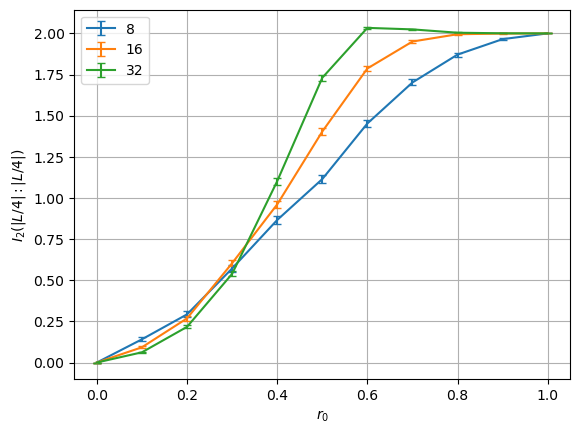

In [39]:
fig,ax=plt.subplots()
for L in L_list:
    r_list=np.linspace(0,1,EE[L].shape[1])
    ax.errorbar(x=r_list,y=EE[L].mean(axis=-1)[0]/np.log(2),yerr=EE[L].std(axis=-1)[0]/np.sqrt(EE[L].shape[-1])/np.log(2),capsize=3,label=L)
ax.legend()
ax.grid('on')
# ax.set_xlim([0,0.5])
ax.set_xlabel(r'$r_0$')
ax.set_ylabel(r'$I_2(|L/4|:|L/4|)$')